In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [2]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

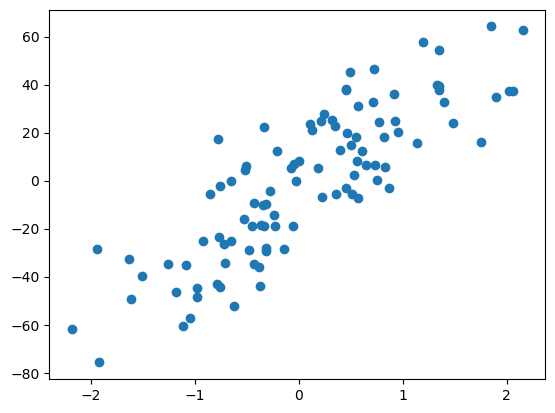

In [3]:
plt.scatter(X,y)

In [4]:
from sklearn.linear_model import LinearRegression,Ridge

In [5]:
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [6]:
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[24.9546267]
-2.1269130035235735


In [7]:
rr = Ridge(alpha=100)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)

[12.93442104]
-1.4248441496033308


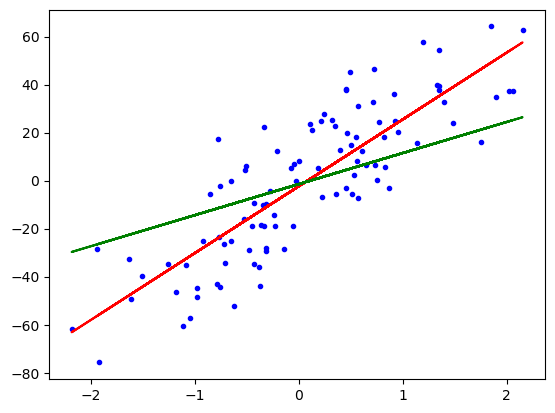

In [8]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red')
plt.plot(X,rr.predict(X),color='green')

In [28]:
class MyRidge:
    def __init__(self,alpha=0.01):
        self.alpha = alpha
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self,X_train,y_train):

        num = 0
        den = 0

        for i in range(X_train.shape[0]):
            num = num + (y_train[i] - y_train.mean())*(X_train[i] - X_train.mean())
            den = den + (X_train[i] - X_train.mean())*(X_train[i] - X_train.mean()) 
        
        self.coef_ = num/(den+self.alpha)
        self.intercept_ = y_train.mean() - self.coef_*X_train.mean()
        

    def predict(self,X_test):
        return X_test*self.coef_ + self.intercept_

In [29]:
rr = MyRidge(alpha=10)
rr.fit(X,y)

In [30]:
rr.coef_

array([24.9546267])

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4,test_size=0.2)

In [5]:
from sklearn.linear_model import Ridge

In [6]:
reg = Ridge(alpha=0.2,solver='cholesky')

In [7]:
reg.fit(X_train,y_train)

Ridge(alpha=0.2, solver='cholesky')

In [8]:
y_pred = reg.predict(X_test)

In [9]:
r2_score(y_test,y_pred)

0.4661873886660295

In [10]:
reg.coef_

array([  46.01767253, -207.6837662 ,  419.09643407,  306.62784828,
        -37.67503581,  -72.27280337, -170.60088554,  143.18836947,
        387.4034786 ,   73.71562386])

In [11]:
reg.intercept_

150.96040354769036

In [21]:
class MyRedge:

    def __init__(self,alpha = 0.1):
        self.alpha  = alpha
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self,X_train,y_train):

        X_train = np.insert(X_train,0,1,axis=1)
        I = np.identity(X_train.shape[1])
        I[0][0] = 0

        result = np.linalg.inv(np.dot(X_train.T,X_train) + self.alpha * I).dot(X_train.T).dot(y_train)

        self.intercept_ = result[0]
        self.coef_ = result[1:]
    def predict(self,X_test):
        return np.dot(X_test,self.coef_) + self.intercept_

In [22]:
myred = MyRedge(alpha=0.2)

In [23]:
myred.fit(X_train,y_train)

In [24]:
y_pred = myred.predict(X_test)

In [25]:
r2_score(y_test,y_pred)

0.4661873886660294

In [26]:
myred.coef_

array([  46.01767253, -207.6837662 ,  419.09643407,  306.62784828,
        -37.67503581,  -72.27280337, -170.60088554,  143.18836947,
        387.4034786 ,   73.71562386])

In [27]:
myred.intercept_

150.96040354769033